In [98]:
import pandas as pd # Importing pandas as pd to access the pandas library

In [99]:
df = pd.read_csv("titanic-passengers.csv", sep = ';') # Changes the comma to semi-colon

In [100]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [101]:
df.head() # Shows the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [102]:
df.info() # Shows the general information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# Step 1:
# Preprocessing

In [103]:
# Checking all the Nan values
df.isnull().sum().sum()

866

In [104]:
# Finding out where are the Nan values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Let us start with replacing the Nan values in Age using the mean function

In [105]:
df['Age'].fillna(df['Age'].mean(), inplace = True) # Inplace will automatically change the dataframe

In [106]:
# Now lets take a look at the Nan value list again
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Great. Now, before we start with Cabin, lets finish Embarked first

In [107]:
# Lets check the values in Embarked using .value_counts which is the same use as mode but for categorical values
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [108]:
# Now we create a mask for Embarked
mask_embarked = pd.isnull(df['Embarked'])
# Lets have a look at it
df[mask_embarked]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,830,Yes,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
399,62,Yes,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


Ooof, that doesn't look good, lets replace them.

In [109]:
# Using the value that was repeated the most (mode), we'll fill the Nan values with them
df['Embarked'].fillna('S', inplace = True)

In [110]:
# lets have a look at it again
df[mask_embarked]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
396,830,Yes,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S
399,62,Yes,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S


Nice. One last step, Cabin

In [111]:
# Now we create a mask for cabin
mask_cabin = pd.isnull(df['Cabin'])

In [112]:
# Check the values of cabin
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
              ..
B42            1
A14            1
B3             1
E10            1
C49            1
Name: Cabin, Length: 147, dtype: int64

Now, we use G6 since it's the highest and easiest to copy compared to the other two highest.

In [113]:
# We fill cabin with that value
df['Cabin'].fillna('G6', inplace = True)

Our final step, lets take one last look at the Nan values

In [114]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Bonus

Since machines only work with numbers, lets replace some of the categories with numbers that machines can comprehend

In [115]:
''' 
Lets create a dictionary for sex to replace male with 0 and female with 1. 
Note that this won't be in the actual df, it'll be in a copy
'''
sex_dict = { 
    'male' : 0,
    'female' : 1    
}

In [116]:
# Create a copy for the new df
new_df = df.copy()

In [117]:
# Replacing male and female with 0 and 1
new_df['Sex'] = new_df['Sex'].apply(lambda x: sex_dict[x])

In [118]:
# Lets make sure it worked
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,G6,S


Nice, but we are not done yet saddly.

Now lets use one hot encoding to remove Embarked and replace them with the three values 'S', 'C' and 'Q'

In [119]:
# Importing the sklearn library to use one hot encoding
from sklearn.preprocessing import LabelEncoder

In [120]:
# Creating the variable 'one hot' to represent Embarked using one hot encoding
one_hot = pd.get_dummies(new_df['Embarked'])

In [121]:
# Lets take a look at it
one_hot

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,1,0,0
887,1,0,0
888,0,0,1
889,0,0,1


In [122]:
# Now, lets join them with our df copy
new_df = new_df.join(one_hot)

In [123]:
# Lastly, we drop embarked
new_df.drop('Embarked', axis = 1, inplace = True)

In [124]:
# Lets take a look at our df copy
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,343,No,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,G6,0,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,0,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,G6,0,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,G6,0,0,1
4,672,No,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,G6,1,0,0
887,61,No,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,G6,1,0,0
888,535,No,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,G6,0,0,1
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,G6,0,0,1


Amazing, we are now done with data preprocessing

# Step 2
# Data visualization

In [125]:
# Importing the library that creates the graphs reqiured for data visualization
import matplotlib.pyplot as plt

In [126]:
# Taking a look at our dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


In [127]:
# Getting all of the important features that can have a relationship towards the survival
df_features = df[['Pclass', 'Sex', 'Age', 'Parch']].copy()

In [128]:
# Importing sns to use .faceitgrid
import seaborn as sns

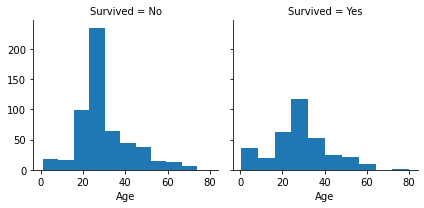

In [129]:
# Studying the distribution
g = sns.FacetGrid(df[['Survived', 'Age']], col = 'Survived')
g.map(plt.hist, 'Age')
plt.show()

We noticed here that the children were most likely to survive. Indicating that the column survived is influenced by individuals age. So, age must be kept as a feature.

In [130]:
# Creating a variable that stores the number of females who survived
female_survived = df.loc[(df['Survived'] == 'Yes') & (df['Sex'] == 'female')].shape[0]
female_survived

233

In [131]:
# Creating a variable that stores the number of females who did not survive
female_notsurvived = df.loc[(df['Survived'] == 'No') & (df['Sex'] == 'female')].shape[0]
female_notsurvived

81

In [132]:
# Creating a variable that stores the number of males who survived
male_survived = df.loc[(df['Survived'] == 'Yes') & (df['Sex'] == 'male')].shape[0]
male_survived

109

In [133]:
# Creating a variable that stores the number of males who did not survive
male_notsurvived = df.loc[(df['Survived'] == 'No') & (df['Sex'] == 'male')].shape[0]
male_notsurvived

468

In [134]:
# Total number of males
total_male = male_survived + male_notsurvived
print(total_male)

577


In [135]:
# Total number of females
total_female = female_survived + female_notsurvived
print(total_female)

314


In [136]:
# Percentage of males who survived
percentage_male = male_survived / total_male * 100
print(percentage_male)

18.890814558058924


In [137]:
# Percentage of females who survived
percentage_female = female_survived / total_female * 100
print(percentage_female)

74.20382165605095


In [138]:
# Creating a dataframe for the gender of the people who survived and who did not
survived = [male_survived, female_survived]
not_survived = [male_notsurvived, female_notsurvived]

index = ['Male', 'Female']
df_male_female = pd.DataFrame({'Survived': survived,
                   'Not survived': not_survived}, index=index)
df_male_female

,Survived,Not survived
Male,109,468
Female,233,81


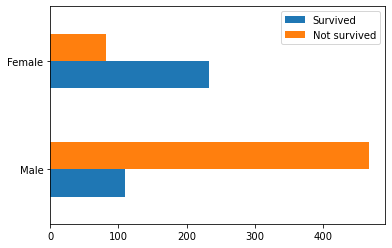

In [139]:
# Putting that dataframe into a plot
ax = df_male_female.plot.barh()

As we can see through this plot, survived is heavily influenced by the sex of the individual. Therefore, sex must be kept as a feature.

Now, we study the correlation between the survival of the passengers and their Pclass

In [140]:
# Checking Pclass values
df_features['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [141]:
# People in Pclass 1 who survived
Pclass_survived_1 = df.loc[(df['Survived'] == 'Yes') & (df['Pclass'] == 1)].shape[0]
Pclass_survived_1

136

In [142]:
# People in Pclass 1 who did not survive
Pclass_notsurvived_1 = df.loc[(df['Survived'] == 'No') & (df['Pclass'] == 1)].shape[0]
Pclass_notsurvived_1

80

In [143]:
# People in Pclass 2 who survived
Pclass_survived_2 = df.loc[(df['Survived'] == 'Yes') & (df['Pclass'] == 2)].shape[0]
Pclass_survived_2

87

In [144]:
# People in Pclass 2 who did not survive
Pclass_notsurvived_2 = df.loc[(df['Survived'] == 'No') & (df['Pclass'] == 2)].shape[0]
Pclass_notsurvived_2

97

In [145]:
# People in Pclass 3 who survived
Pclass_survived_3 = df.loc[(df['Survived'] == 'Yes') & (df['Pclass'] == 3)].shape[0]
Pclass_survived_3

119

In [146]:
# People in Pclass 3 who did not survive
Pclass_notsurvived_3 = df.loc[(df['Survived'] == 'No') & (df['Pclass'] == 3)].shape[0]
Pclass_notsurvived_3

372

In [147]:
# Creating a dataframe for the people in different pclasses who survived and who did not
survived = [Pclass_survived_1, Pclass_survived_2, Pclass_survived_3]
not_survived = [Pclass_notsurvived_1, Pclass_notsurvived_2, Pclass_notsurvived_3]

index = ['1st class', '2nd class', '3rd class']
df_pclass = pd.DataFrame({'Survived': survived,
                   'Not survived': not_survived}, index=index)
df_pclass

,Survived,Not survived
1st class,136,80
2nd class,87,97
3rd class,119,372


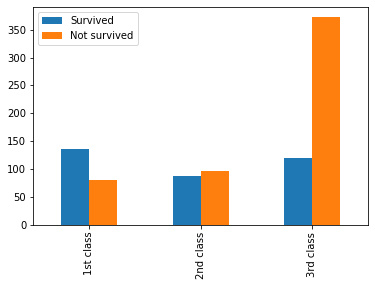

In [148]:
# Putting the dataframe into a plot
bx = df_pclass.plot.bar()

Judging by the plot, the survival is heavily influenced by the Pclass as the people in the 3rd class are much more likely to not survive. Indicating that Pclass is a neccesary feature and should be kept.

In [149]:
# Taking a look at the values in Parch
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [150]:
# Assigning the number of Parch in a list of survived and not survived
survived = []
not_survived = []
for i in range(7):
    survived.append(df.loc[(df['Survived'] == 'Yes') & (df['Parch'] == i)].shape[0])
    not_survived.append(df.loc[(df['Survived'] == 'No') & (df['Parch'] == i)].shape[0])

In [151]:
# Creating a dataframe for the people with differnet numbers of parch who survived and who did not
index = ['0', '1', '2', '3', '4', '5', '6']
df_parch = pd.DataFrame({'Survived': survived,
                   'Not survived': not_survived}, index=index)
df_parch

,Survived,Not survived
0,233,445
1,65,53
2,40,40
3,3,2
4,0,4
5,1,4
6,0,1


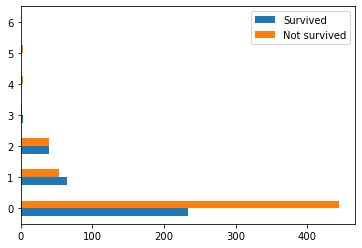

In [152]:
# Putting the dataframe in a plot
cx = df_parch.plot.barh()

Looking at this plot, we can deduce that the survival of the individuals is affected by the parch. Therefore, making parch an important feature that should be kept. As the people with 0 parch are more likely to not survive.

# Step 3:
# The function

In [153]:
# Defining the function
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [154]:
# Checking our dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


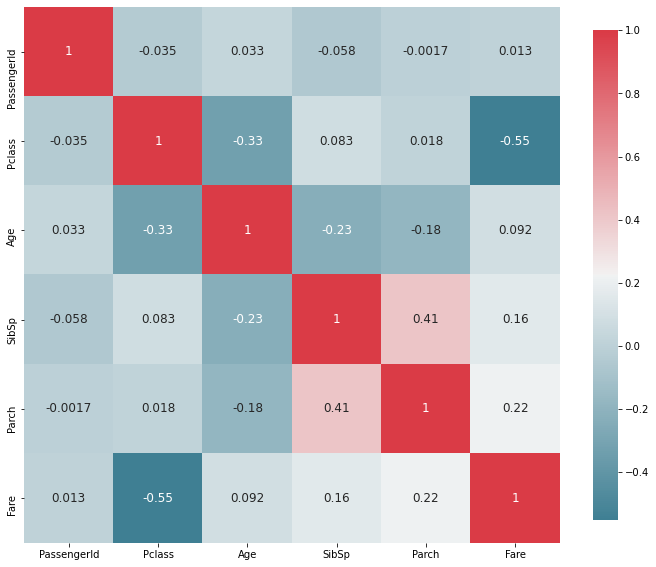

In [155]:
# Checking what the function does
plot_correlation_map(df)

The function provided creates a plot as shown above, the plot presented to us above is called a heatmap. Basically, what a heatmap does is that it shows the correlation between a column to another.The color bar on the right is the scale of how good the relationship is between these columns, the further you go away from the 0, the stronger the relationship. The positive numbers signifies that as the column increases, the other column inreases as well. However, a negative integer in the heatmap shows that as the column increases, the other column decreases.

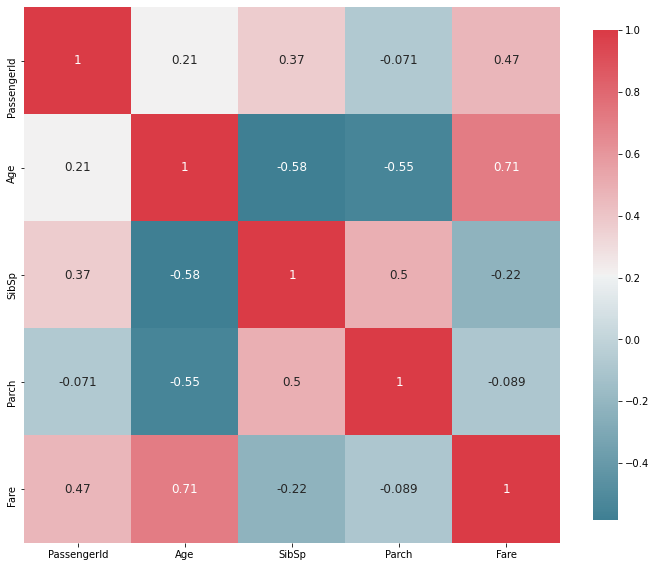

In [156]:
# Correlation between the mean of pclass and survived in a heatmap
plot_correlation_map(df.groupby(['Pclass', 'Survived']).mean())

In [157]:
# Function that applies the abbreviations 
import numpy as np
def get_title(a):
    if 'Mr.' in a:
        return 'Mr.'
    elif 'Mrs.' in a:
        return 'Mrs.'
    elif 'Miss.' in a:
        return 'Miss.'
    elif 'Master.' in a:
        return 'Master.'
    elif 'Dr.' in a:
        return 'Dr.'
    else: 
        return np.nan
    

In [158]:
# Applying the function
df['Title'] = df['Name'].apply(get_title)

In [159]:
# Creating a copy for df that drops the nan values
df_drop = df.dropna(subset = ['Title']).copy()

In [160]:
# Dictionary to convert into numerical data
title_dict = { 
    'Mr.' : 0,
    'Mrs.' : 1,
    'Miss.' : 2,
    'Master.' :3,
    'Dr.': 4
}

In [161]:
# Applying our dictionary 
df_drop['Title_n'] = df_drop['Title'].apply(lambda x: title_dict[x])

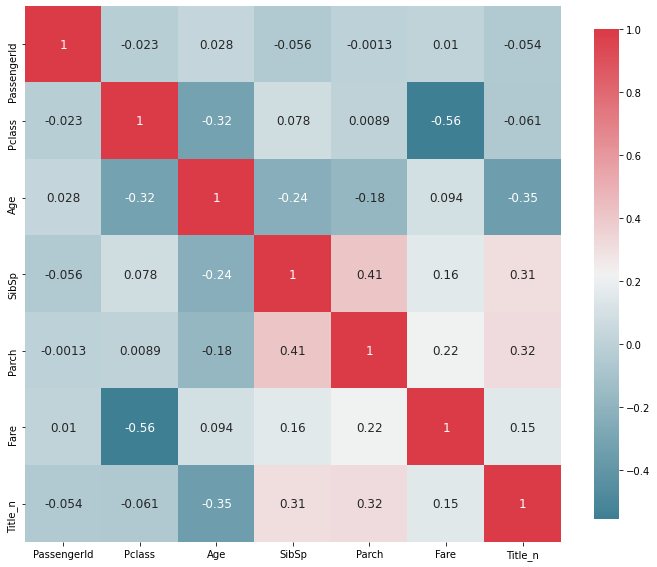

In [162]:
# Heatmap for the new dataframe
plot_correlation_map(df_drop)

In [163]:
# Dictionary is for refrence only
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty" ,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [164]:
# Defining a function to apply our dictionary into
def get_title(a):
    if 'Mr.' in a:
        return 'Mrs'
    elif 'Mrs.' in a:
        return 'Mrs'
    elif 'Miss.' in a:
        return 'Miss'
    elif 'Mlle.' in a:
        return 'Miss'
    elif 'Master.' in a:
        return 'Master'
    elif 'Mme.' in a:
        return 'Miss'
    elif 'Dona.' in a:
        return 'Royalty'
    elif 'the Countess.' in a:
        return 'Royalty'
    elif 'Lady.' in a:
        return 'Royalty'
    elif 'Sir.' in a:
        return 'Royalty'
    elif 'Don.' in a:
        return 'Royalty'
    elif 'Jonkheer.' in a:
        return 'Royalty'
    elif 'Rev.' in a:
        return 'Officer'
    elif 'Dr.' in a:
        return 'Officer'
    elif 'Major.' in a:
        return 'Officer'
    elif 'Capt.' in a:
        return 'Officer'   
    elif 'Col.' in a:
        return 'Officer'
    elif 'Ms' in a:
        return 'Mrs'
    else: 
        return np.nan

In [165]:
# Applying the dictionary into the title column
df['Title'] = df['Name'].apply(get_title)

In [166]:
# Making sure that everything is applied correctly
df['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [167]:
# Dictionary to convert into numerical data
new_title_dict = { 
    'Mrs' : 0,
    'Miss' : 1,
    'Master' : 2,
    'Officer' :3,
    'Royalty' :4
}

In [168]:
# Applying the dictionary into the new column that we will add into the dataframe
df['Title_n'] = df['Title'].apply(lambda x: new_title_dict[x])

In [169]:
# Checking our dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_n
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S,Mrs,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S,Mrs,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S,Mrs,0
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,Mrs,0
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C,Mrs,0
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S,Miss,1
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S,Mrs,0


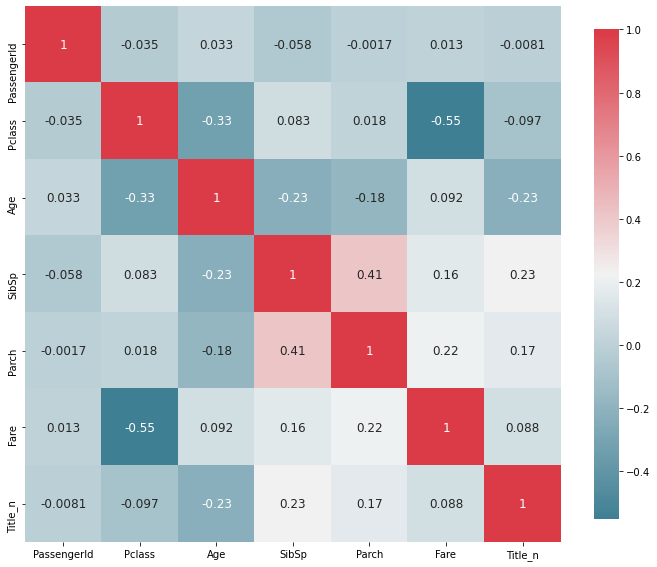

In [170]:
# Creating a heatmap that includes the title_n
plot_correlation_map(df)

In [171]:
# Adding familysize into our dataframe
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

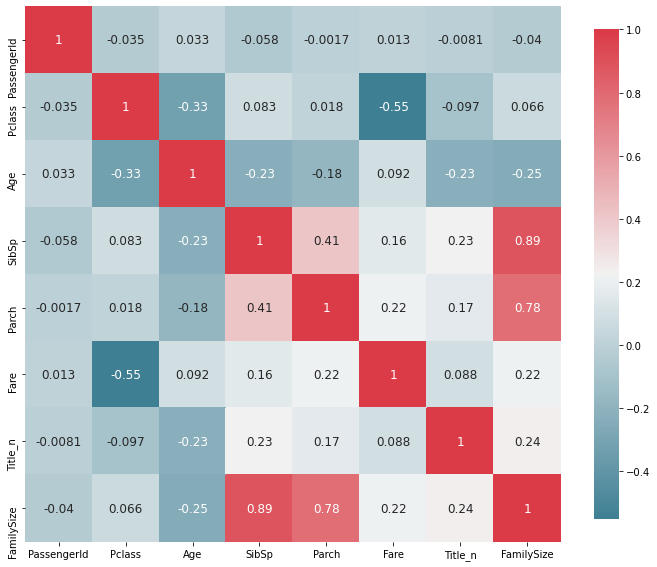

In [172]:
# Creating a heatmap that includes the familysize column
plot_correlation_map(df)

So, we have concluded that FamilySize is an important feature because it shows a correlation with both the Age and the Title. It is not that much of an important feature as it only shows a relationship with half of the other features.

# Checkpoint 7

# Step 1

In [173]:
df_features

,Pclass,Sex,Age,Parch
0,2,male,28.000000,0
1,3,male,25.000000,0
2,3,male,20.000000,0
3,3,female,29.000000,4
4,1,male,31.000000,0
...,...,...,...,...
886,2,female,14.000000,0
887,3,male,22.000000,0
888,3,female,30.000000,0
889,3,male,29.699118,0


In [174]:
# Dictionary for the converstion of male and female to 0 and 1
sex_dict = { 
    'male' : 0,
    'female' : 1    
}

In [175]:
# Applying the dictionary into the dataframe
df_features['Sex'] = df_features['Sex'].apply(lambda x: sex_dict[x])

In [176]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y = df['Survived']
x = df_features

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

# applying tree algorithm
tree_model = tree.DecisionTreeClassifier()  
# fitting our model
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

# Step 2

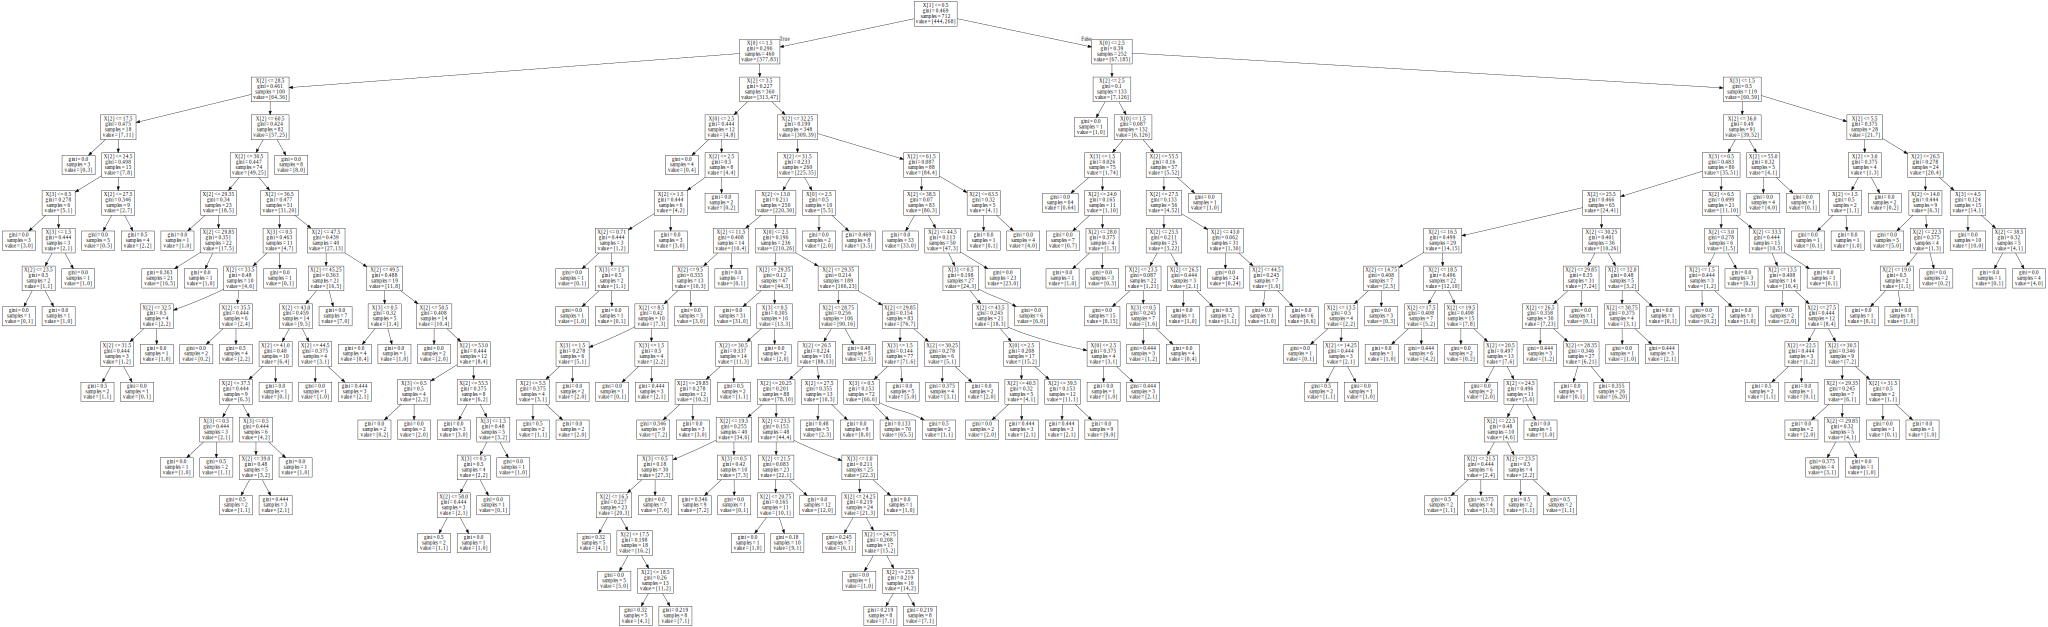

In [177]:
#importing relevant library
import graphviz

dot_data = tree.export_graphviz(tree_model, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [178]:
x_test

,Pclass,Sex,Age,Parch
590,3,0,29.699118,0
131,3,1,22.000000,0
628,3,0,29.699118,0
195,3,0,32.000000,0
230,3,1,29.699118,0
...,...,...,...,...
456,3,1,29.699118,2
191,2,1,28.000000,0
603,1,1,24.000000,0
94,3,0,29.699118,0


We will pick one row from x_test, I chose 590

Using our tree, I traced that the person in row 590 did not survive. Now, let us check if our prediction is true.

In [179]:
y_test

590     No
131    Yes
628    Yes
195     No
230     No
      ... 
456    Yes
191    Yes
603    Yes
94      No
766     No
Name: Survived, Length: 179, dtype: object

Our manual prediction was true

In [180]:
y_pred=tree_model.predict(x_test) 

print("score:{}".format(accuracy_score(y_test, y_pred)*100))

score:78.2122905027933


# Step 3

In [181]:
tree_model = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "random")

In [182]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

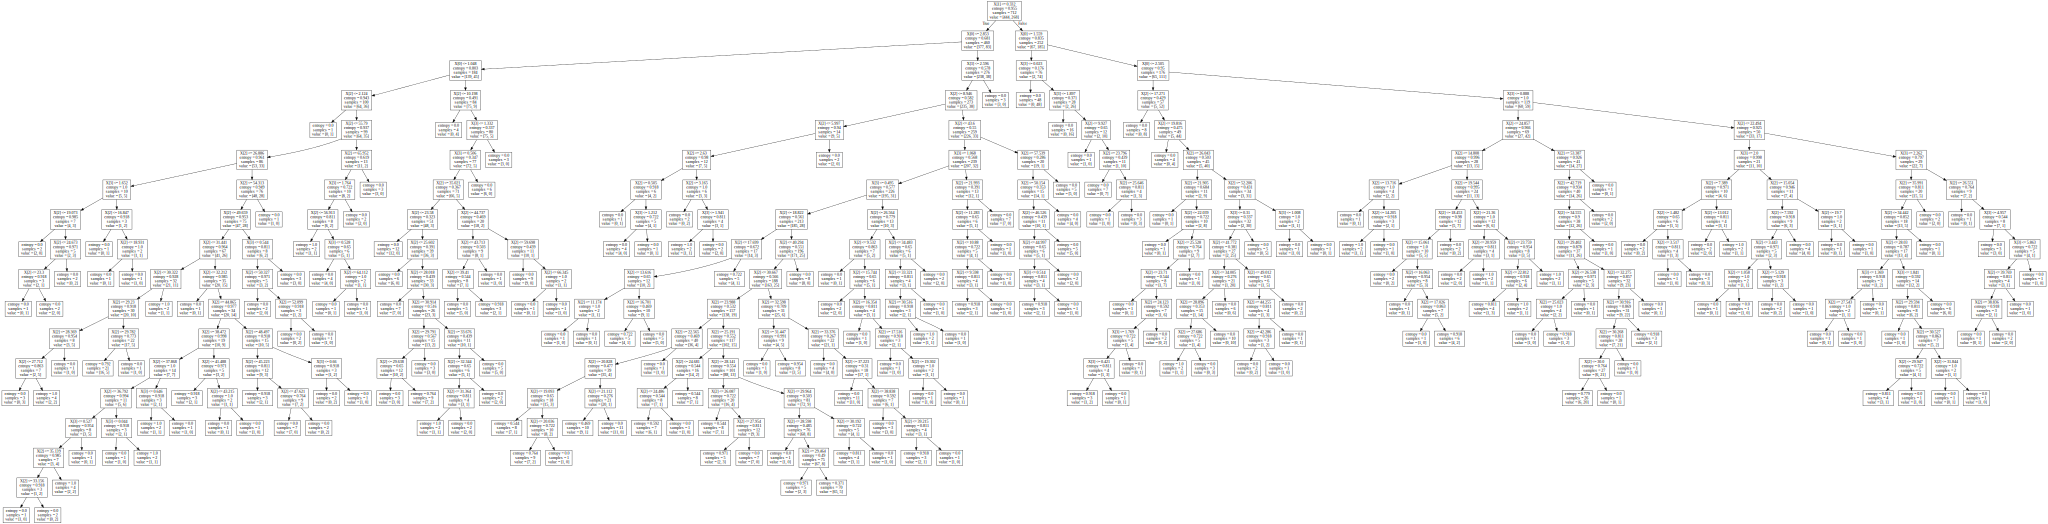

In [183]:
dot_data = tree.export_graphviz(tree_model, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

Again, I used row 590 and manually predicted his survival. My conclusion was true

# Step 4

In [184]:
y_pred=tree_model.predict(x_test) 

print("score:{}".format(accuracy_score(y_test, y_pred)*100))

score:77.09497206703911


We can conclude that our previous model is slightly more accurate than our new model because the accuracy in our new model is 77% while the accuracy in our old model is 78%

# Step 5

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [186]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train) 

RandomForestClassifier(n_estimators=10)

# Step 6

In [188]:
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100) 

Accuracy: 77.6536312849162


We can see that the random forest model is roughly more accurate than our previous model and is slighlty less accurate than our oldest model.